In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler


from sklearn.metrics import precision_recall_curve,f1_score, fbeta_score
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from collections import defaultdict


Getting the dataset

In [2]:
df=pd.read_csv('file:///C:/Users/BereketSharew/Desktop/Metis_Classes/NBM_Classification_Student/Classification project/Dry_Bean_Dataset csv.csv')

In [3]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [5]:
df['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

In [6]:
#Data cleaning


In [7]:
df.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

# EDA

In [12]:
# use a few features to see hoe predictive they are
df1 = df.filter(['Area','Perimeter','MajorAxisLength','MinorAxisLength','AspectRation','Eccentricity','ConvexArea','EquivDiameter','Class'], axis=1)
df2 = df.loc[:,'Extent':'Class']

In [14]:
df2.head()

,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


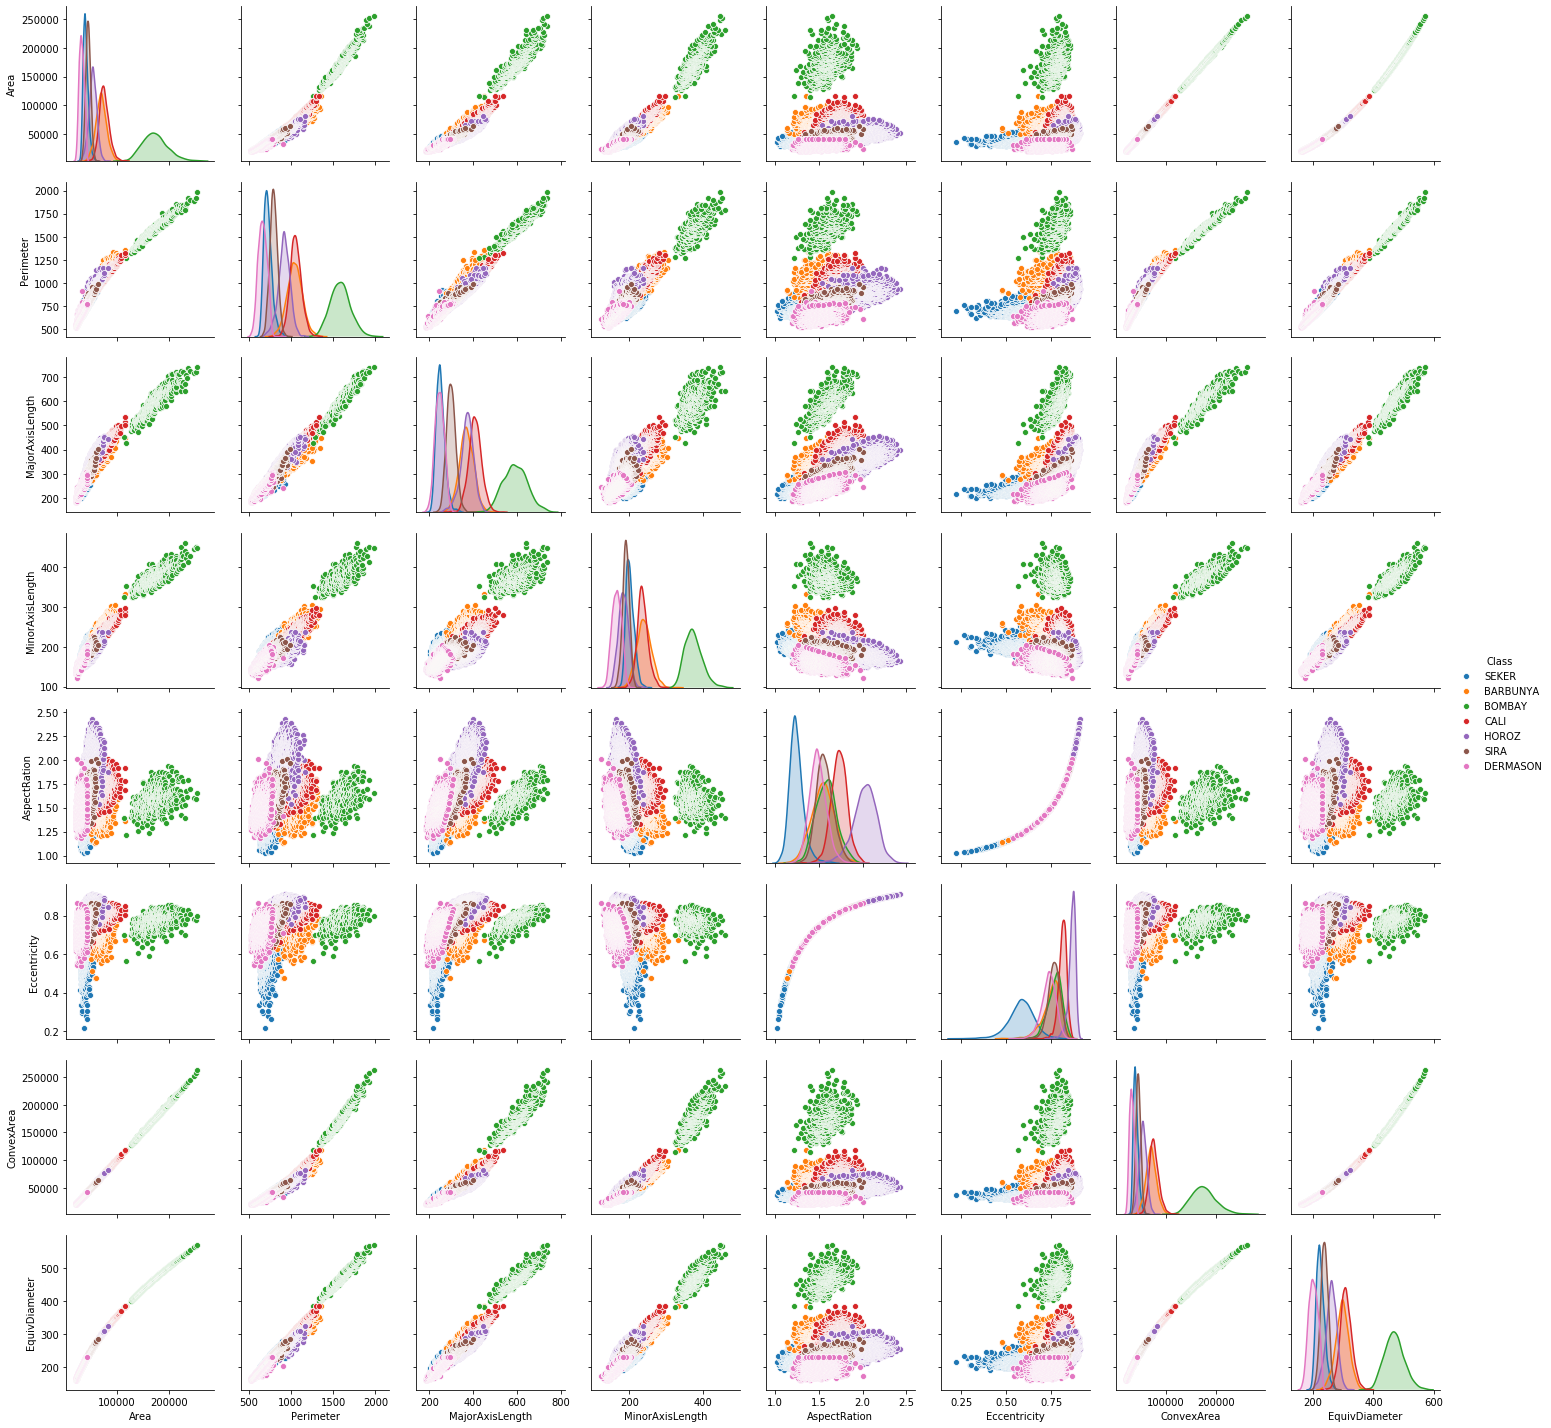

In [15]:

sns.pairplot(df1, hue='Class')

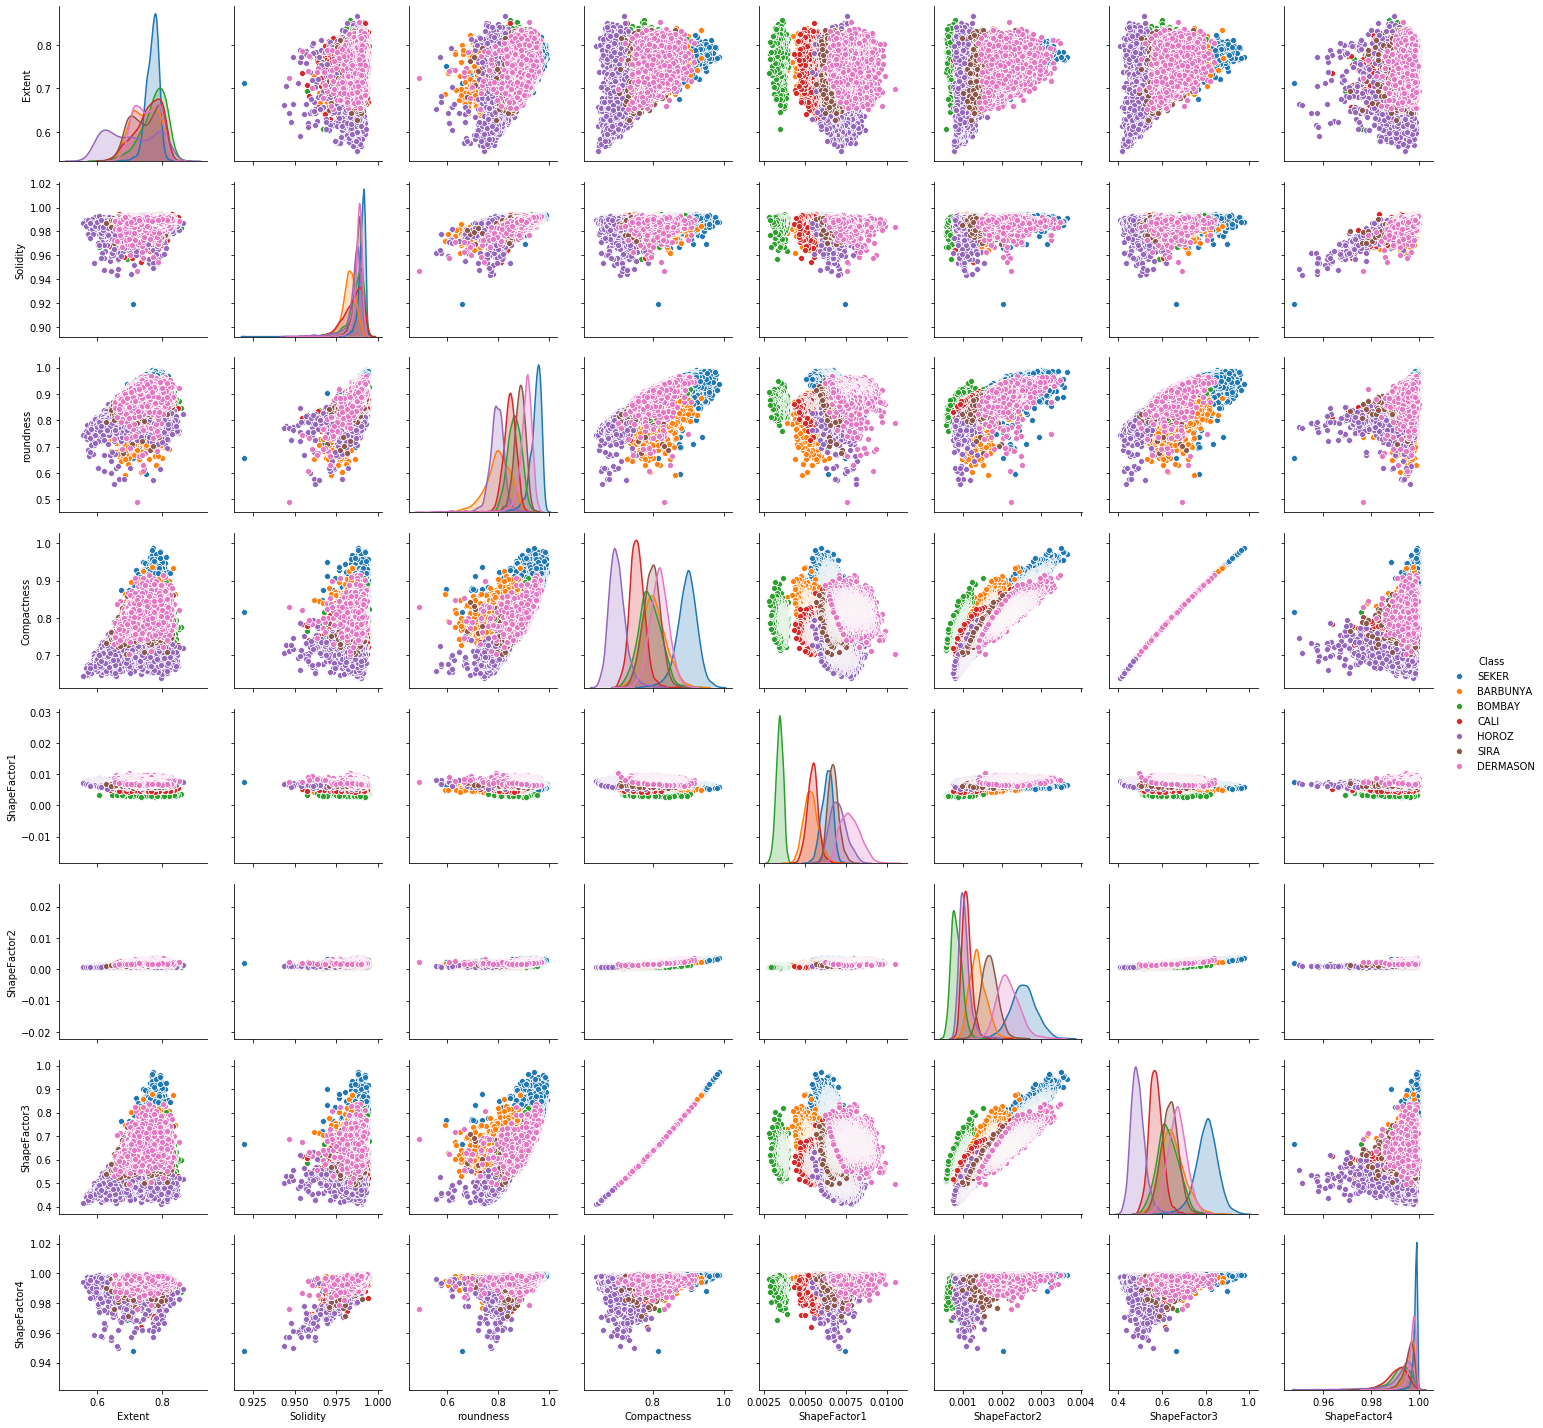

In [16]:
sns.pairplot(df2, hue='Class')

More data analysis is done on Tableau. From the Analysis, Shape Factor 4 and Solidity doesnt have significant difference from class to class, So they are not predictive features.

In [118]:
#Droping Shape factor 4 and solidity from the dataframe.
df = df.filter(['Area','Perimeter','MajorAxisLength','MinorAxisLength','AspectRation','Eccentricity','ConvexArea','EquivDiameter','Extent','roundness','Compactness','ShapeFactor1','ShapeFactor2','ShapeFactor3','Class'], axis=1)

# Train/Test dataset split

In [123]:
x = df.loc[:,'Area':'ShapeFactor3']
y = df['Class']

In [124]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42)

# 1. Baseline Model using KNN

In [125]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
print("Training Score : {:6.2f}%".format(100*knn.score(x_train, y_train)))

Training Score :  81.67%


In [126]:
#Confusion matrix for KNN

y_preds = knn.predict(x_test)
confusion_matrix(y_test, y_preds)


array([[118,   0, 104,   0,  30,   0,   9],
       [  0, 117,   0,   0,   0,   0,   0],
       [100,   0, 202,   0,  14,   0,   1],
       [  0,   0,   0, 597,   1,  31,  42],
       [ 42,   0,  24,  14, 268,   1,  59],
       [  2,   0,   0,  84,   8, 257,  62],
       [  0,   0,   0,  69,  45,  22, 400]], dtype=int64)

In [127]:
# Clasiification Report
print(classification_report(y_test, y_preds, labels =['DERMASON','SIRA','SEKER','HOROZ',
'CALI','BARBUNYA','BOMBAY']))

              precision    recall  f1-score   support

    DERMASON       0.78      0.89      0.83       671
        SIRA       0.70      0.75      0.72       536
       SEKER       0.83      0.62      0.71       413
       HOROZ       0.73      0.66      0.69       408
        CALI       0.61      0.64      0.62       317
    BARBUNYA       0.45      0.45      0.45       261
      BOMBAY       1.00      1.00      1.00       117

    accuracy                           0.72      2723
   macro avg       0.73      0.71      0.72      2723
weighted avg       0.72      0.72      0.72      2723



In [128]:

print("Testinng Accuracy : {:6.2f}%".format(100* knn.score(x_test, y_test)))

print("Precision : {:6.4f},   Recall : {:6.4f}".format(precision_score(y_test,y_preds, average='macro', pos_label='positive'), 
                                                     recall_score(y_test, y_preds, average='macro', pos_label='positive')))

Testinng Accuracy :  71.94%
Precision : 0.7287,   Recall : 0.7149


C:\Users\BereketSharew\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


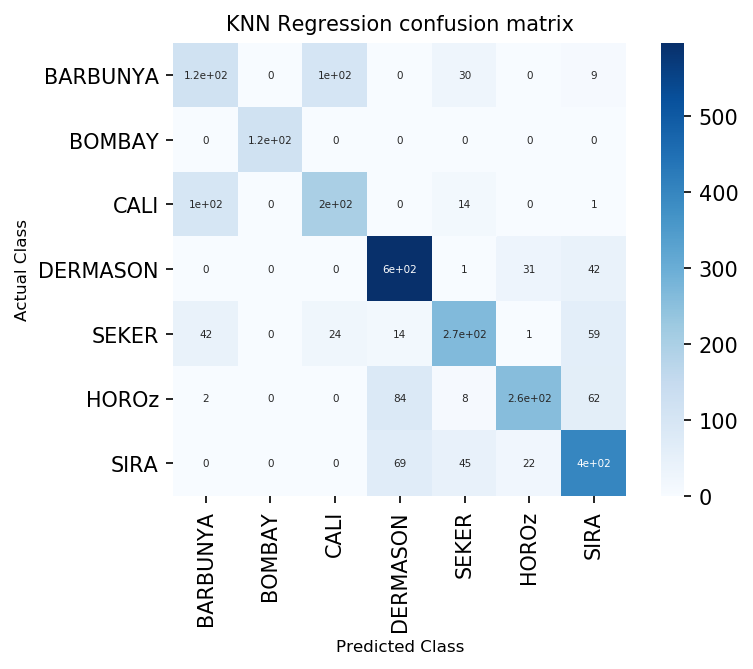

In [129]:
#confusion matrix heatmap for KNN
knn_confusion = confusion_matrix(y_test, knn.predict(x_test))
plt.figure(dpi=150)
sns.heatmap(knn_confusion, cmap=plt.cm.Blues, annot=True, square=True, annot_kws={"fontsize":5},
           xticklabels=['BARBUNYA','BOMBAY','CALI','DERMASON','SEKER','HOROz','SIRA'],
           yticklabels=['BARBUNYA','BOMBAY','CALI','DERMASON','SEKER','HOROz','SIRA'],)

plt.xlabel('Predicted Class',fontsize = 8)
plt.ylabel('Actual Class',fontsize = 8)
plt.title('KNN Regression confusion matrix',fontsize = 10);

plt.savefig("confusion_matrix_knn_mvp")




# 2. Random forest model

In [233]:
#Random Forest
randomforest = RandomForestClassifier(n_estimators=10)
randomforest.fit(x_train, y_train)
randomforest.score(x_train, y_train)

0.9943056576047025

In [234]:
y_pred = randomforest.predict(x_test)


In [235]:
print("Testing Accuracy : {:6.2f}%".format(100* randomforest.score(x_test, y_test)))

print("Precision : {:6.4f},   Recall : {:6.4f}".format(precision_score(y_test,y_pred, average='macro', pos_label='positive'), 
                                                     recall_score(y_test, y_pred , average='macro', pos_label='positive')))

Testing Accuracy :  91.96%
Precision : 0.9323,   Recall : 0.9291


C:\Users\BereketSharew\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


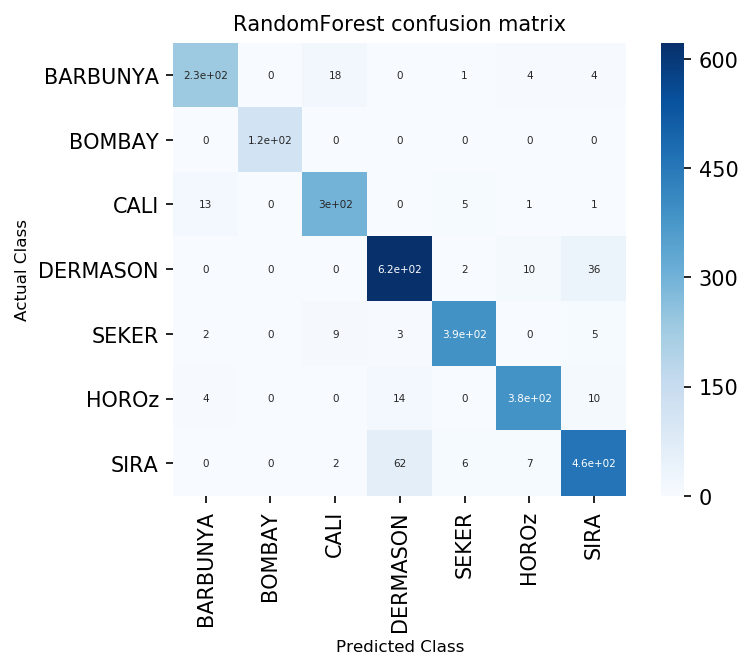

In [236]:
#confusion matrix heatmap for KNN
RandomForest_confusion = confusion_matrix(y_test, randomforest.predict(x_test))
plt.figure(dpi=150)
sns.heatmap(RandomForest_confusion, cmap=plt.cm.Blues, annot=True, square=True, annot_kws={"fontsize":5},
           xticklabels=['BARBUNYA','BOMBAY','CALI','DERMASON','SEKER','HOROz','SIRA'],
           yticklabels=['BARBUNYA','BOMBAY','CALI','DERMASON','SEKER','HOROz','SIRA'],)

plt.xlabel('Predicted Class',fontsize = 8)
plt.ylabel('Actual Class',fontsize = 8)
plt.title('RandomForest confusion matrix',fontsize = 10);

plt.savefig("confusion_matrix_randoforest_withoutscaling")


In [49]:
# Since I want my model to have a high presision, Random Forest has a better performance than KNN
#Lets proceed to improve the model 

# Feature Scalling 


In [ ]:
# The features are in very different scales we need to scale our dataset

In [224]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [225]:
randomforest = RandomForestClassifier(n_estimators=50)
randomforest.fit(X_train, y_train)
randomforest.score(X_train, y_train)

0.9999081557678178

In [226]:
y_predicts = randomforest.predict(X_test)


In [227]:
# Clasiification Report
print(classification_report(y_test, y_predicts, labels =['DERMASON','SIRA','SEKER','HOROZ',
'CALI','BARBUNYA','BOMBAY']))

              precision    recall  f1-score   support

    DERMASON       0.90      0.92      0.91       671
        SIRA       0.87      0.88      0.88       536
       SEKER       0.97      0.94      0.96       413
       HOROZ       0.97      0.95      0.96       408
        CALI       0.92      0.94      0.93       317
    BARBUNYA       0.92      0.90      0.91       261
      BOMBAY       1.00      1.00      1.00       117

    accuracy                           0.92      2723
   macro avg       0.94      0.93      0.94      2723
weighted avg       0.92      0.92      0.92      2723



In [228]:
print("Testing Accuracy : {:6.2f}%".format(100* randomforest.score(X_test, y_test)))

print("Precision : {:6.4f},   Recall : {:6.4f}".format(precision_score(y_test,y_predicts, average='macro', pos_label='positive'), 
                                                     recall_score(y_test, y_predicts , average='macro', pos_label='positive')))

Testing Accuracy :  92.43%
Precision : 0.9367,   Recall : 0.9335


C:\Users\BereketSharew\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


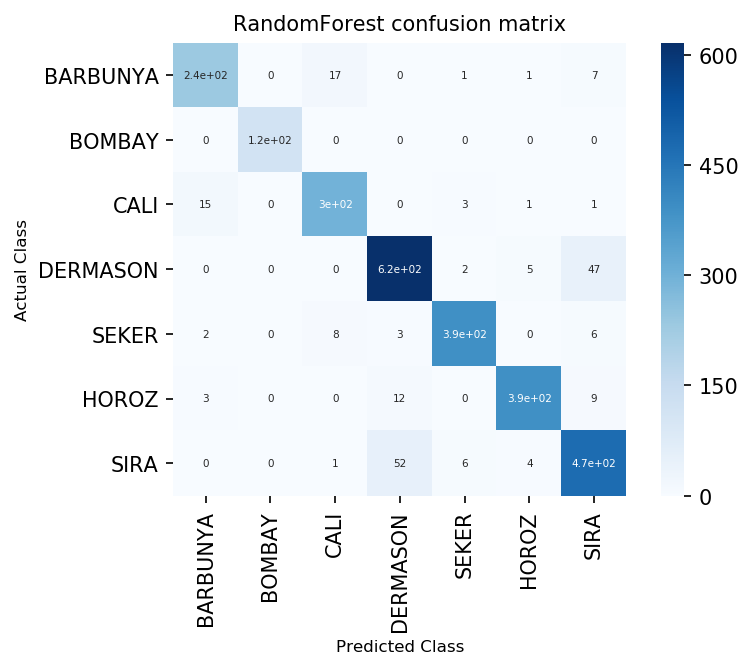

In [232]:
#confusion matrix heatmap for KNN
RandomForest_confusion = confusion_matrix(y_test, randomforest.predict(X_test))
plt.figure(dpi=150)
sns.heatmap(RandomForest_confusion, cmap=plt.cm.Blues, annot=True, square=True, annot_kws={"fontsize":5},
           xticklabels=['BARBUNYA','BOMBAY','CALI','DERMASON','SEKER','HOROZ','SIRA'],
           yticklabels=['BARBUNYA','BOMBAY','CALI','DERMASON','SEKER','HOROZ','SIRA'],)

plt.xlabel('Predicted Class',fontsize = 8)
plt.ylabel('Actual Class',fontsize = 8)
plt.title('RandomForest confusion matrix',fontsize = 10);

plt.savefig("confusion_matrix_Randomforest")

In [175]:
print('Parameters currently in use:\n')
print(randomforest.get_params())

Parameters currently in use:

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


## Hyperparameter Optimization

Parameters to test for optimization \
max_depth = [1,5,10] --> [5,10,15] --> make change based on observation \
max_features = [1,5,10] --> [10,15,16] --> make chage based on observation \
n_estimator = (50,100,150) -->(100,150,200) --> make change based on observation 

In [218]:
from sklearn.metrics import make_scorer

# These parameters are selected after doing multiple experimental runs
parameters={'max_depth':[10,15,20],'max_features':[10,15,16],'n_estimators':(100,200,300)}
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average = 'macro'),
           'recall': make_scorer(recall_score, average = 'macro'),
           'f1_macro': make_scorer(f1_score, average = 'macro'),
           'f1_weighted': make_scorer(f1_score, average = 'weighted')}
model = RandomForestClassifier(random_state=1000)
gs = GridSearchCV(model,parameters,scoring=scorer,cv=5, n_jobs = -1)

In [219]:
gs.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=1000, verbose=0,
                                              warm_start=False),
             iid

In [220]:
best_grid = gs.best_estimator_
best_grid.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=15, max_features=16, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=1000,
                       verbose=0, warm_start=False)

In [221]:
y_predicts = best_grid.predict(X_test)

In [215]:
# Clasiification Report
print(classification_report(y_test, y_predicts, labels =['DERMASON','SIRA','SEKER','HOROZ',
'CALI','BARBUNYA','BOMBAY']))

              precision    recall  f1-score   support

    DERMASON       0.90      0.92      0.91       671
        SIRA       0.88      0.88      0.88       536
       SEKER       0.96      0.94      0.95       413
       HOROZ       0.97      0.96      0.97       408
        CALI       0.92      0.94      0.93       317
    BARBUNYA       0.93      0.90      0.92       261
      BOMBAY       1.00      1.00      1.00       117

    accuracy                           0.93      2723
   macro avg       0.94      0.93      0.94      2723
weighted avg       0.93      0.93      0.93      2723



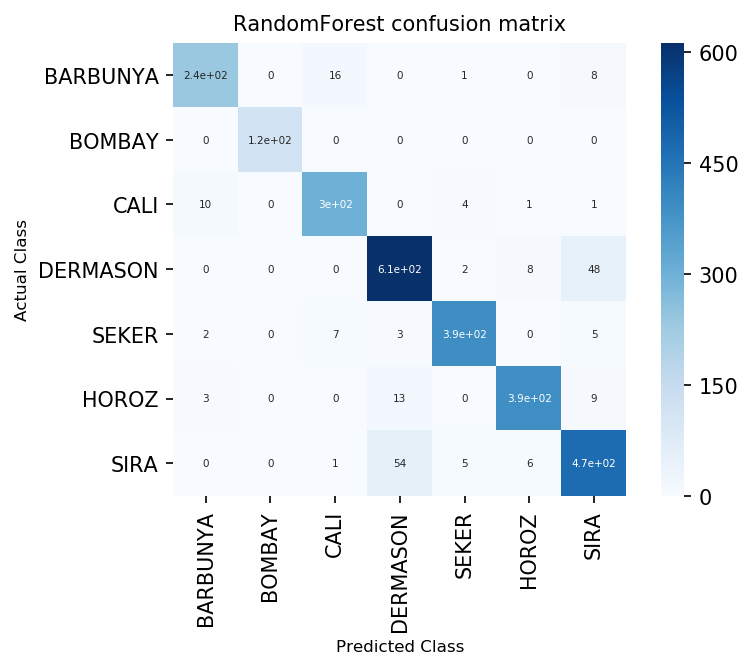

In [250]:
#confusion matrix heatmap for KNN
RandomForest_confusion = confusion_matrix(y_test, best_grid.predict(X_test))
plt.figure(dpi=150)
sns.heatmap(RandomForest_confusion, cmap=plt.cm.Blues, annot=True, square=True, annot_kws={"fontsize":5},
           xticklabels=['BARBUNYA','BOMBAY','CALI','DERMASON','SEKER','HOROZ','SIRA'],
           yticklabels=['BARBUNYA','BOMBAY','CALI','DERMASON','SEKER','HOROZ','SIRA'],)

plt.xlabel('Predicted Class',fontsize = 8)
plt.ylabel('Actual Class',fontsize = 8)
plt.title('RandomForest confusion matrix',fontsize = 10);

plt.savefig("confusion_matrix_Randomforest_best_grid")

The hyper parameter optimization has Increased the Model Accuracy by 1 percent

# 3. Naive bayes model

In [150]:
nb = GaussianNB()
nb.fit(X_train, y_train)
print("Accuracy score: {:6.4f}".format(nb.score(X_train, y_train)))

#Confusion Matrix

predictions = nb.predict(X_test)
print(confusion_matrix(y_test, predictions))


Accuracy score: 0.8952
[[212   0  37   0   1   1  10]
 [  0 117   0   0   0   0   0]
 [ 29   0 284   0   3   0   1]
 [  0   0   0 583   0  16  72]
 [  1   0   5   6 393   0   3]
 [  7   0   0   4   0 392  10]
 [  2   0   0  36  12   6 480]]


In [151]:
print("Testing Accuracy : {:6.2f}%".format(100* nb.score(X_test, y_test)))

print("Precision : {:6.4f},   Recall : {:6.4f}".format(precision_score(y_test, predictions, average='macro', pos_label='positive'), 
                                                     recall_score(y_test, predictions , average='macro', pos_label='positive')))

Testing Accuracy :  90.38%
Precision : 0.9116,   Recall : 0.9121


C:\Users\BereketSharew\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [153]:
# Clasiification Report
print(classification_report(y_test, predictions, labels =['DERMASON','SIRA','SEKER','HOROZ',
'CALI','BARBUNYA','BOMBAY']))

              precision    recall  f1-score   support

    DERMASON       0.93      0.87      0.90       671
        SIRA       0.83      0.90      0.86       536
       SEKER       0.94      0.95      0.95       413
       HOROZ       0.96      0.96      0.96       408
        CALI       0.87      0.90      0.88       317
    BARBUNYA       0.84      0.81      0.83       261
      BOMBAY       1.00      1.00      1.00       117

    accuracy                           0.90      2723
   macro avg       0.91      0.91      0.91      2723
weighted avg       0.91      0.90      0.90      2723

